# 머신러닝
### 1번 

### 데이터 설명
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.     
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.     
- Description: Product (item) name. Nominal.    
- Quantity: The quantities of each product (item) per transaction. Numeric.     
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.   
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.    
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.     
- Country: Country name. Nominal, the name of the country where each customer resides.     


### 데이터 출처
- https://archive.ics.uci.edu/ml/index.php

In [97]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url1 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/8주차_0709/data/problem1.csv'
encoded_url1 = urllib.parse.quote(url1, safe=':/')

response = urllib.request.urlopen(encoded_url1, context=context)
df1 = pd.read_csv(response, encoding='utf-8')
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany
...,...,...,...,...,...,...,...,...
41019,560590,21884,CAKES AND BOWS GIFT TAPE,12,7/19/2011 15:55,0.65,12560.0,Germany
41020,561870,21156,RETROSPOT CHILDRENS APRON,8,7/31/2011 11:45,1.95,14911.0,EIRE
41021,579792,22436,12 COLOURED PARTY BALLOONS,20,11/30/2011 15:43,0.65,12714.0,France
41022,C566753,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,9/14/2011 15:48,9.95,14911.0,EIRE


#### 1-1. 결측치를 확인하고, 결측치 제거할 것

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41024 entries, 0 to 41023
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    41024 non-null  object 
 1   StockCode    41024 non-null  object 
 2   Description  41024 non-null  object 
 3   Quantity     41024 non-null  int64  
 4   InvoiceDate  41024 non-null  object 
 5   UnitPrice    41024 non-null  float64
 6   CustomerID   41024 non-null  float64
 7   Country      41024 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.5+ MB


In [100]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,41024.000000,41024.000000,41024.000000
mean,19.425507,4.652498,13173.076102
std,44.253624,45.383856,1006.392842
min,-480.000000,0.000000,12348.000000
25%,4.000000,1.250000,12484.000000
50%,10.000000,1.950000,12647.000000
75%,16.000000,3.750000,14156.000000
max,2400.000000,4161.060000,17097.000000


In [107]:
df1.isna().value_counts()

InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  CustomerID  Country
False      False      False        False     False        False      False       False      41024
dtype: int64

In [112]:
df1["CustomerID"] = df1["CustomerID"].astype(int)
df1["InvoiceDate"] = pd.to_datetime(df1["InvoiceDate"])

In [128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41024 entries, 0 to 41023
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    41024 non-null  object        
 1   StockCode    41024 non-null  object        
 2   Description  41024 non-null  object        
 3   Quantity     41024 non-null  int64         
 4   InvoiceDate  41024 non-null  datetime64[ns]
 5   UnitPrice    41024 non-null  float64       
 6   CustomerID   41024 non-null  int32         
 7   Country      41024 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 2.3+ MB


#### 1-2. 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것

In [127]:
df1[(df1["CustomerID"] == 12474) & (df1["UnitPrice"] == 1.65) & (df1["StockCode"] == "22972")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
32,C572488,22972,CHILDREN'S SPACEBOY MUG,-1,2011-10-24 13:57:00,1.65,12474,Germany
618,570640,22972,CHILDREN'S SPACEBOY MUG,12,2011-10-11 12:38:00,1.65,12474,Germany
15995,547005,22972,CHILDREN'S SPACEBOY MUG,12,2011-03-18 14:20:00,1.65,12474,Germany


In [130]:
df1["CustomerID"].nunique()

348

In [134]:
import datetime as dt

print(df1["InvoiceDate"].min(), df1["InvoiceDate"].max())
now = dt.datetime(2011, 12, 10)
print(now)

2010-12-01 08:45:00 2011-12-09 12:50:00
2011-12-10 00:00:00


In [141]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2011-09-07 14:13:00,1.69,14911,EIRE,27.04
1,560452,22432,WATERING CAN PINK BUNNY,6,2011-07-19 09:51:00,1.95,12682,France,11.70
2,578509,22492,MINI PAINT SET VINTAGE,36,2011-11-24 13:17:00,0.65,12705,Germany,23.40
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,2011-11-29 11:46:00,3.75,12727,France,30.00
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,2011-08-22 12:40:00,1.65,12645,Germany,19.80
...,...,...,...,...,...,...,...,...,...
41019,560590,21884,CAKES AND BOWS GIFT TAPE,12,2011-07-19 15:55:00,0.65,12560,Germany,7.80
41020,561870,21156,RETROSPOT CHILDRENS APRON,8,2011-07-31 11:45:00,1.95,14911,EIRE,15.60
41021,579792,22436,12 COLOURED PARTY BALLOONS,20,2011-11-30 15:43:00,0.65,12714,France,13.00
41022,C566753,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,2011-09-14 15:48:00,9.95,14911,EIRE,-9.95


In [138]:
df1["Total_Price"] = df1["Quantity"] * df1["UnitPrice"]

In [146]:
rfm = df1.groupby('CustomerID').agg({'Total_Price': lambda price: price.sum(),
                                     'InvoiceNo': lambda num: len(num), 
                                     'InvoiceDate': lambda date: (now - date.max()).days
                                    })

In [148]:
rfm

,Total_Price,InvoiceNo,InvoiceDate
CustomerID,,,
12348,1797.24,31,75
12349,1757.55,73,18
12350,334.40,17,310
12352,1545.41,95,36
12354,1079.40,58,232
...,...,...,...
14935,1784.71,10,297
14936,8117.42,366,9
14937,1617.63,35,56


In [152]:
rfm[rfm.Total_Price < 0]

,Total_Price,InvoiceNo,InvoiceDate
CustomerID,,,
12503,-1126.0,1,337
12505,-4.5,1,301
12605,-7.5,3,365


In [164]:
df1["Description"].nunique()

2853

In [158]:
df1.StockCode.value_counts()

POST     1038
22423     309
22326     295
22554     208
22556     194
         ... 
85087       1
23137       1
20957       1
85111       1
21392       1
Name: StockCode, Length: 2749, dtype: int64

In [165]:
df1[df1.StockCode == "POST"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Total_Invoice
11,545034,POST,POSTAGE,1,NaN,40.0,13493,Switzerland,40.0,NaN
52,C539409,POST,POSTAGE,-1,NaN,18.0,12720,Germany,-18.0,NaN
98,540976,POST,POSTAGE,7,NaN,18.0,12652,France,126.0,NaN
129,564216,POST,POSTAGE,2,NaN,18.0,12642,Germany,36.0,NaN
144,571851,POST,POSTAGE,4,NaN,28.0,12596,Spain,112.0,NaN
...,...,...,...,...,...,...,...,...,...,...
40759,569568,POST,POSTAGE,5,NaN,18.0,12700,France,90.0,NaN
40860,564858,POST,POSTAGE,5,NaN,28.0,12484,Spain,140.0,NaN
40940,576607,POST,POSTAGE,4,NaN,18.0,12474,Germany,72.0,NaN
40955,562207,POST,POSTAGE,9,NaN,15.0,12643,France,135.0,NaN


In [166]:
df1[df1.StockCode == "22423"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Total_Invoice
374,565214,22423,REGENCY CAKESTAND 3 TIER,12,NaN,12.75,14911,EIRE,153.00,NaN
445,538174,22423,REGENCY CAKESTAND 3 TIER,32,NaN,10.95,12471,Germany,350.40,NaN
579,541220,22423,REGENCY CAKESTAND 3 TIER,160,NaN,10.95,14156,EIRE,1752.00,NaN
653,571446,22423,REGENCY CAKESTAND 3 TIER,32,NaN,10.95,14911,EIRE,350.40,NaN
700,577316,22423,REGENCY CAKESTAND 3 TIER,1,NaN,12.75,12578,Italy,12.75,NaN
...,...,...,...,...,...,...,...,...,...,...
40780,566816,22423,REGENCY CAKESTAND 3 TIER,16,NaN,10.95,12731,France,175.20,NaN
40790,562374,22423,REGENCY CAKESTAND 3 TIER,32,NaN,10.95,14911,EIRE,350.40,NaN
40898,C563600,22423,REGENCY CAKESTAND 3 TIER,-1,NaN,12.75,14911,EIRE,-12.75,NaN
40958,C573037,22423,REGENCY CAKESTAND 3 TIER,-11,NaN,10.95,12471,Germany,-120.45,NaN


In [167]:
df1[df1.StockCode == "22326"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Total_Invoice
48,561194,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,NaN,2.95,13814,Germany,17.7,NaN
292,573868,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,NaN,2.95,12491,France,17.7,NaN
297,581175,22326,ROUND SNACK BOXES SET OF4 WOODLAND,96,NaN,2.55,14646,Netherlands,244.8,NaN
581,578033,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,NaN,2.95,12656,France,17.7,NaN
664,557669,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,NaN,2.95,12674,France,17.7,NaN
...,...,...,...,...,...,...,...,...,...,...
39224,567196,22326,ROUND SNACK BOXES SET OF4 WOODLAND,12,NaN,2.95,12379,Belgium,35.4,NaN
39462,568176,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,NaN,2.95,12685,France,17.7,NaN
39575,545994,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,NaN,2.95,12623,Germany,17.7,NaN
40724,544193,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,NaN,2.95,12431,Belgium,17.7,NaN


In [174]:
rfm["Stocks"] = df1.groupby('CustomerID')['StockCode'].apply(list)
rfm["Item_purchased"] = df1.groupby('CustomerID')['Description'].apply(list)
# df.groupby('a').agg({'b':lambda x: list(x)})
rfm

,Total_Price,InvoiceNo,InvoiceDate,Item_purchased,Stocks
CustomerID,,,,,
12348,1797.24,31,75,"[SET OF 9 BLACK SKULL BALLOONS, 60 TEATIME FAI...","[22437, 84991, 23078, 21977, 22952, 23078, 217..."
12349,1757.55,73,18,"[STRAWBERRY CERAMIC TRINKET POT, WRAP RED APPL...","[21232, 22704, 22555, 37448, 22722, 22064, 225..."
12350,334.40,17,310,"[PLASTERS IN TIN VINTAGE PAISLEY , BLUE POLKAD...","[22557, 20652, 21171, 22412, 21908, 21864, 226..."
12352,1545.41,95,36,"[POSTAGE, SET OF 3 REGENCY CAKE TINS, PINK HEA...","[POST, 23245, 84050, 22982, 37448, 22701, 2278..."
12354,1079.40,58,232,"[SPACEBOY LUNCH BOX , FIVE CATS HANGING DECORA...","[22629, 22317, 23052, 21240, 23201, 22138, 228..."
...,...,...,...,...,...
14935,1784.71,10,297,"[POPPY'S PLAYHOUSE BEDROOM , FELTCRAFT PRINCES...","[22745, 22751, 22746, 22748, 22749, 22750, 229..."
14936,8117.42,366,9,"[RETROSPOT LARGE MILK JUG, JUMBO BAG PINK VINT...","[21533, 21929, 22083, 84836, 48185, 22966, 225..."
14937,1617.63,35,56,"[SWEETHEART RECIPE BOOK STAND, FELTCRAFT GIRL ...","[22795, 23127, 21531, 22749, 22144, 20971, 209..."


#### 1-3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성하고 더 좋은 모델을 선택하라

In [182]:
feature = rfm.copy()
feature = feature.drop(["Stocks", "Item_purchased"], axis=1)

In [183]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 12348 to 17097
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total_Price  348 non-null    float64
 1   InvoiceNo    348 non-null    int64  
 2   InvoiceDate  348 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 19.0 KB


In [193]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN, KMeans

model = KMeans(n_clusters=5, algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=["predict"]

C:\Users\Devin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Devin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Devin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [194]:
predict.value_counts()

predict
0          253
4           76
3           15
2            3
1            1
dtype: int64

In [202]:
r = pd.concat([feature,predict],axis=1)

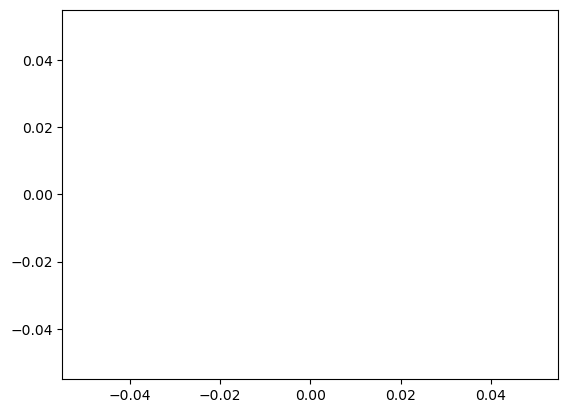

In [206]:
plt.scatter(r["Total_Price"], r["InvoiceNo"], c=r["predict"], alpha=.5)



plt.show()

In [207]:
r

,Total_Price,InvoiceNo,InvoiceDate,predict
12348,1797.24,31.0,75.0,NaN
12349,1757.55,73.0,18.0,NaN
12350,334.40,17.0,310.0,NaN
12352,1545.41,95.0,36.0,NaN
12354,1079.40,58.0,232.0,NaN
...,...,...,...,...
343,NaN,NaN,NaN,0.0
344,NaN,NaN,NaN,4.0
345,NaN,NaN,NaN,0.0
346,NaN,NaN,NaN,0.0


### 2번
#### 2-1. 위에서 생성한 군집들의 특성을 분석할 것

#### 2-2. 각 군집 별 대표 추천 상품을 도출할 것

#### 2-3. CustomerID가 12413인 고객을 대상으로 KNN을 이용하여 추천할 상품을 제시해라

# 통계

### 3. 철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90% 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

[ref1](https://wikidocs.net/167723)

[ref2](https://wikidocs.net/167723)

$$
    n = \frac{Z^2*p(1-p)}{e^2}
$$

In [7]:
import scipy
from scipy.stats import norm

Z = norm.ppf(.95)
p = .9
e = .05

n = Z*Z*p*(1-p) / e**2
print(f'적절한 최소 표본 크기는 : {round(n)+1} 이다')

### 4. A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 problem4.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.

In [21]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

#url2 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/9주차_0716/data/problem4.csv'
#encoded_url2 = urllib.parse.quote(url2, safe=':/')

#response = urllib.request.urlopen(encoded_url2, context=context)
#df2 = pd.read_csv(response, encoding='utf-8')
df2 = pd.read_csv('problem4.csv')
df2

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0
5,male,83.9
6,male,91.2
7,male,103.2
8,male,83.0
9,male,101.2


#### 4-1 연구가설과 귀무가설을 설정하라
- H0: 남녀학생 평균 혈압에 차이가 없다 (동일하다).
- H1: 남녀학생 평균 혈압에 차이가 있다 (동일하지 않다).

#### 4-2 소수점 2자리 반올림하여 95% 신뢰구간을 구하라. 연구가설 채택여부를 결정하고, 신뢰구간이 연구가설 채택에 어떤 역할을 하는지 설명하라.

In [58]:
from scipy.stats import ttest_ind, ttest_ind_from_stats

male = df2[df2.gender == "male"].pressure.tolist()
female = df2[df2.gender == "female"].pressure.tolist()

mean_male = df2[df2.gender == "male"].pressure.mean()
mean_female = df2[df2.gender == "female"].pressure.mean()
male_std = df2[df2.gender == "male"].pressure.std()
female_std = df2[df2.gender == "female"].pressure.std()
m = 16
f = 9

stat, pvalue = ttest_ind(male, female)
print(f'Independent ttest 결과 p_value가 {pvalue:.3f}로 0.05보다 크므로 귀무가설을 채택, 혈압의 차이는 없다.')
print(ttest_ind_from_stats(mean1 = mean_male, std1 = male_std, nobs1=m,
                           mean2 = mean_female, std2 = female_std, nobs2=f))

Independent ttest 결과 p_value가 0.124로 0.05보다 크므로 귀무가설을 채택, 혈압의 차이는 없다.
Ttest_indResult(statistic=1.5983350245749042, pvalue=0.12361716364314838)


### 5번 아래는 후보A의 선거구별 지지 현황표다. 후보A의 지지율이 선거구별로 차이가 있는지를 검정하라.

<img width="498" src="https://github.com/Ssunbell/ADP_study/assets/97590480/3b057a61-b1e2-42c7-895d-c3234b866975">

#### 5-1. 귀무가설과 연구가설을 설정하라 
- H0: 후보 A의 지지율은 선거구별로 차이가 없다 (동일하다)
- H1: 후보 A의 지지율은 선거구별로 차이가 있다

#### 5-2. 소수점 2자리 반올림하여 통계량을 구하고 95% 수준에서 연구가설 채택여부를 결정하라.

In [64]:
import numpy as np
from scipy.stats import chi2_contingency

table = np.array([[176, 193, 159], [124, 107, 141]])
p_value = chi2_contingency(table).pvalue
print(f'Chisquare test 결과 p_value가 {pvalue:.3f}로 0.05보다 작으므로 대립가설 채택, 선거구별 지지율의 차이가 있다.')

Chisquare test 결과 p_value가 0.124로 0.05보다 작으므로 대립가설 채택, 선거구별 지지율의 차이가 있다.


### 6. 1월 ~9월까지 9개월간의 국제 Silver 가격이 다음과 같다. 

<img width="463" src="https://github.com/Ssunbell/ADP_study/assets/97590480/ebcaf02c-2ef9-47c5-aed1-4514d3e01370">

#### 6-1. 1월 대비 9월의 은값 상승률을 소수점 2자리 반올림하여 구하라 

In [80]:
from scipy.stats import gmean
from statistics import geometric_mean

price = [12.14, 42.6, 34.4, 35.29, 30.96, 57.12, 37.84, 42.49, 31.38]
#print(gmean(price), geometric_mean(price))
print(f'1월 대비 9월 은값 상승률은 {gmean(price):.2f} % 이다.')

1월 대비 9월 은값 상승률은 33.70 % 이다.


#### 6-2. Silver 가격의 추이를 이동평균(3N)과 함께 나타나도록 시각화하라 

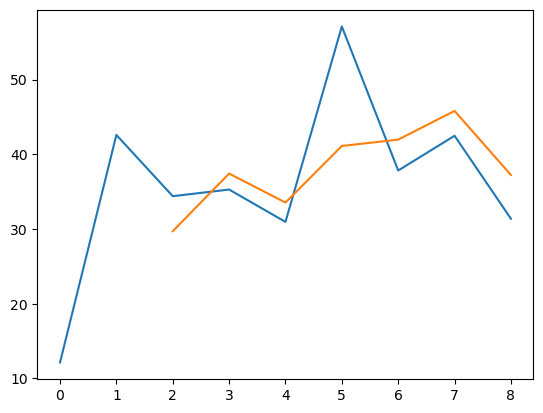

In [91]:
import matplotlib.pyplot as plt

df = pd.DataFrame(price)
df_window = df.rolling(3).mean()

plt.plot(df)
plt.plot(df_window)

### 7. height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라. A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다. 이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다

In [93]:
import ssl
import pandas as pd
import urllib
#context = ssl._create_unverified_context()

#url3 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/9주차_0716/data/problem7.csv'
#encoded_url3 = urllib.parse.quote(url3, safe=':/')
#response = urllib.request.urlopen(encoded_url3, context=context)
#df3 = pd.read_csv(response, encoding='utf-8')
df3 = pd.read_csv('problem7.csv')
df3

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499
...,...,...,...
406,174.207,73.736,80.1779
407,174.702,74.529,80.1306
408,176.858,76.083,80.4527
409,175.566,76.459,80.2019


#### 7-1 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
- 베이지안 회귀
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. 이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.

In [96]:
import random
random.seed(1234)

#### 7-2  7-1에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라